- 颜色表https://blog.csdn.net/weixin_42643547/article/details/103683412?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.compare&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.compare

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [127]:
# 2读取数据
data = pd.read_csv("../data/alltime_world_2020_04_27.csv")
data.head()

,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input,name
0,2020-03-03,1,0,0,0,0,0,1,0.0,0,0,NaN,NaN,NaN,突尼斯
1,2020-03-08,2,0,0,0,0,0,1,0.0,0,0,0.0,NaN,0.0,突尼斯
2,2020-03-09,5,0,0,0,0,0,3,0.0,0,0,0.0,NaN,0.0,突尼斯
3,2020-03-11,7,0,0,0,0,0,2,0.0,0,0,0.0,NaN,0.0,突尼斯
4,2020-03-12,13,0,0,0,0,0,6,0.0,0,0,0.0,NaN,0.0,突尼斯


In [128]:
# 2更改列名
name_dict = {'date':'日期','id':"编号", 'name':'名称', 'lastUpdateTime':'更新时间', 'total_confirm':'累计确诊', 'total_suspect':'累计疑似',
       'total_heal':'累计治愈', 'total_dead':'累计死亡', 'total_severe':'累计重症', 'total_input':'累计输入',
       'total_newConfirm':'累计新增确诊', 'total_newDead':'累计新增死亡', 'total_newHeal':'累计新增治愈', 'today_confirm':'当日新增确诊',
       'today_suspect':'当日新增疑似', 'today_heal':'当日新增疑似', 'today_dead':'当日新增死亡', 'today_severe':'当日新增疑似',
       'today_storeConfirm':'当日现存确诊', 'today_input':'当日新增输入'}

In [129]:
data.rename(columns=name_dict,inplace=True)

In [130]:
data.head()

,日期,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,当日新增确诊,当日新增疑似,当日新增疑似,当日新增死亡,当日新增疑似,当日现存确诊,当日新增输入,名称
0,2020-03-03,1,0,0,0,0,0,1,0.0,0,0,NaN,NaN,NaN,突尼斯
1,2020-03-08,2,0,0,0,0,0,1,0.0,0,0,0.0,NaN,0.0,突尼斯
2,2020-03-09,5,0,0,0,0,0,3,0.0,0,0,0.0,NaN,0.0,突尼斯
3,2020-03-11,7,0,0,0,0,0,2,0.0,0,0,0.0,NaN,0.0,突尼斯
4,2020-03-12,13,0,0,0,0,0,6,0.0,0,0,0.0,NaN,0.0,突尼斯


In [131]:
# 3查看数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Data columns (total 15 columns):
日期        6519 non-null object
累计确诊      6519 non-null int64
累计疑似      6519 non-null int64
累计治愈      6519 non-null int64
累计死亡      6519 non-null int64
累计重症      6519 non-null int64
累计输入      6519 non-null int64
当日新增确诊    6519 non-null int64
当日新增疑似    6181 non-null float64
当日新增疑似    6519 non-null int64
当日新增死亡    6519 non-null int64
当日新增疑似    5781 non-null float64
当日现存确诊    0 non-null float64
当日新增输入    6322 non-null float64
名称        6519 non-null object
dtypes: float64(4), int64(9), object(2)
memory usage: 764.0+ KB


In [132]:
# 4查看描述性统计
data.describe()

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,当日新增确诊,当日新增疑似,当日新增疑似,当日新增死亡,当日新增疑似,当日现存确诊,当日新增输入
count,6519.000000,6519.000000,6519.000000,6519.000000,6519.000000,6519.000000,6519.000000,6181.000000,6519.000000,6519.000000,5781.000000,0.0,6322.000000
mean,9196.338089,41.978371,2330.602393,557.738764,16.886792,5.951680,453.184077,7.361268,127.951220,31.590581,-1.257914,NaN,0.259095
std,46233.311053,858.327853,10673.305880,3019.041795,276.409364,89.865755,2295.456198,138.171924,686.307634,174.403622,18.176682,NaN,9.517747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-269.000000,0.000000,-2247.000000,-14.000000,-464.000000,NaN,-19.000000
25%,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,345.000000,0.000000,21.000000,5.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,2142.500000,0.000000,235.000000,47.000000,0.000000,0.000000,135.000000,0.000000,15.000000,4.000000,0.000000,NaN,0.000000
max,986045.000000,28942.000000,118777.000000,55377.000000,7365.000000,1636.000000,39049.000000,4008.000000,24510.000000,4856.000000,0.000000,NaN,723.000000


In [133]:
#5日期修改为datetime
data["日期"] = pd.to_datetime(data["日期"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Data columns (total 15 columns):
日期        6519 non-null datetime64[ns]
累计确诊      6519 non-null int64
累计疑似      6519 non-null int64
累计治愈      6519 non-null int64
累计死亡      6519 non-null int64
累计重症      6519 non-null int64
累计输入      6519 non-null int64
当日新增确诊    6519 non-null int64
当日新增疑似    6181 non-null float64
当日新增疑似    6519 non-null int64
当日新增死亡    6519 non-null int64
当日新增疑似    5781 non-null float64
当日现存确诊    0 non-null float64
当日新增输入    6322 non-null float64
名称        6519 non-null object
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 764.0+ KB


In [134]:
#6计算当日现存确诊
data['当日现存确诊'] = data['累计确诊'] - data['累计死亡'] - data['累计治愈']
data.head()

,日期,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,当日新增确诊,当日新增疑似,当日新增疑似,当日新增死亡,当日新增疑似,当日现存确诊,当日新增输入,名称
0,2020-03-03,1,0,0,0,0,0,1,0.0,0,0,NaN,1,NaN,突尼斯
1,2020-03-08,2,0,0,0,0,0,1,0.0,0,0,0.0,2,0.0,突尼斯
2,2020-03-09,5,0,0,0,0,0,3,0.0,0,0,0.0,5,0.0,突尼斯
3,2020-03-11,7,0,0,0,0,0,2,0.0,0,0,0.0,7,0.0,突尼斯
4,2020-03-12,13,0,0,0,0,0,6,0.0,0,0,0.0,13,0.0,突尼斯


In [135]:
#7查看一共多少个国家
data['名称'].unique().shape[0]

203

In [136]:
#8统计每天有多少个国家出现疫情
data['日期'].value_counts().head(10)

2020-04-21    203
2020-04-07    162
2020-03-26    157
2020-04-04    153
2020-03-31    148
2020-03-30    147
2020-04-10    146
2020-04-22    145
2020-04-16    144
2020-04-11    140
Name: 日期, dtype: int64

In [137]:
# 9设置日期为索引
data.set_index('日期',inplace=True)

In [138]:
data.head(5)

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,当日新增确诊,当日新增疑似,当日新增疑似,当日新增死亡,当日新增疑似,当日现存确诊,当日新增输入,名称
日期,,,,,,,,,,,,,,
2020-03-03,1,0,0,0,0,0,1,0.0,0,0,NaN,1,NaN,突尼斯
2020-03-08,2,0,0,0,0,0,1,0.0,0,0,0.0,2,0.0,突尼斯
2020-03-09,5,0,0,0,0,0,3,0.0,0,0,0.0,5,0.0,突尼斯
2020-03-11,7,0,0,0,0,0,2,0.0,0,0,0.0,7,0.0,突尼斯
2020-03-12,13,0,0,0,0,0,6,0.0,0,0,0.0,13,0.0,突尼斯


In [139]:
#10创建层次化索引
data = data.groupby(['日期','名称']).mean()
data.head()

,,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,累计输入,当日新增确诊,当日新增疑似,当日新增疑似,当日新增死亡,当日新增疑似,当日现存确诊,当日新增输入
日期,名称,,,,,,,,,,,,,
2020-01-20,韩国,1,0,0,0,0,0,1,0.0,0,0,NaN,1,NaN
2020-01-21,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-22,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-23,韩国,1,0,0,0,0,0,0,0.0,0,0,NaN,1,0.0
2020-01-24,韩国,2,0,0,0,0,0,1,0.0,0,0,NaN,2,0.0


In [140]:
#11绘制多个国家累计确诊人数折线图

data_part = data.loc(axis=0)[:,['中国','美国','日本','意大利','英国']]
data_part.head(5)

累计确诊  累计疑似  累计治愈  累计死亡  累计重症  累计输入  当日新增确诊  当日新增疑似  当日新增疑似  \
日期         名称                                                                
2020-01-28 日本      4     0     0     0     0     0       4     0.0       0   
2020-01-30 日本      6     0     0     0     0     0       2     0.0       0   
2020-01-31 意大利     2     0     0     0     0     0       2     0.0       0   
           日本     15     0     0     0     0     0       9     0.0       0   
2020-02-01 意大利     2     0     0     0     0     0       0     0.0       0   

                当日新增死亡  当日新增疑似  当日现存确诊  当日新增输入  
日期         名称                                   
2020-01-28 日本        0     NaN       4     NaN  
2020-01-30 日本        0     NaN       6     0.0  
2020-01-31 意大利       0     NaN       2     NaN  
           日本        0     NaN      15     0.0  
2020-02-01 意大利       0     NaN       2     0.0

In [141]:
data_part.reset_index('名称',inplace=True)

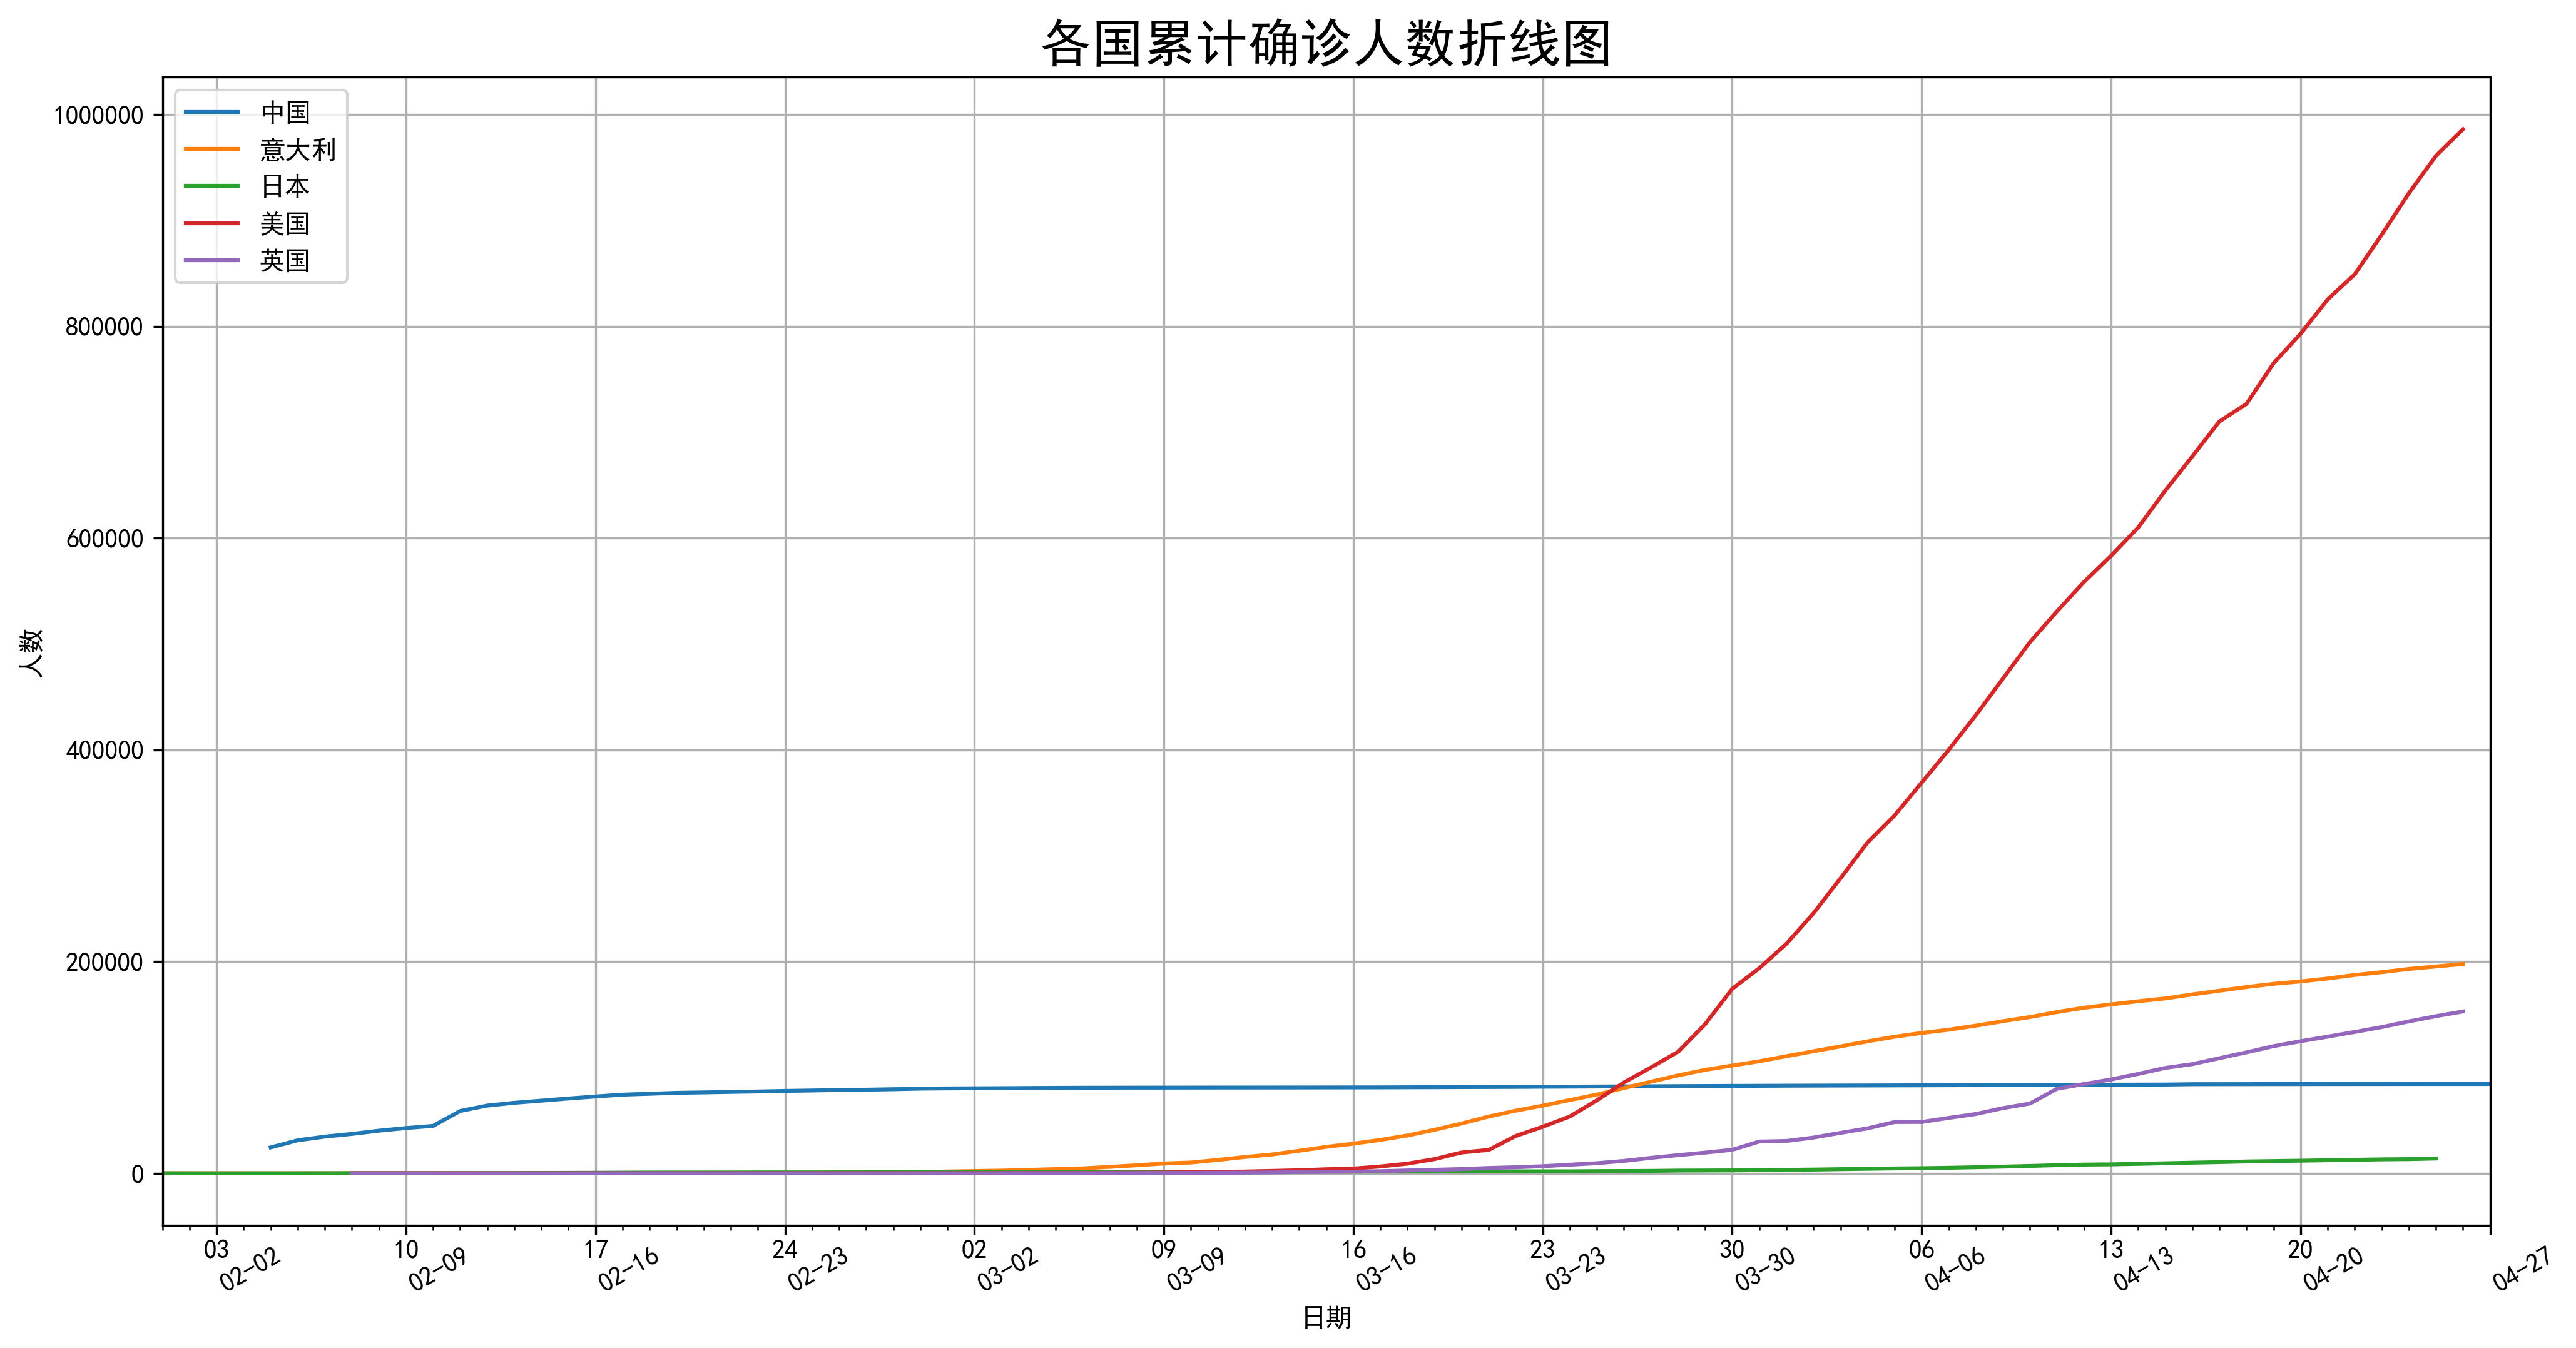

In [142]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import datetime
plt.rcParams['font.sans-serif'] = 'SimHei'
fig,ax=plt.subplots(figsize=(16,9),dpi=300)
data_part['2020-02':].groupby('名称')['累计确诊'].plot(legend=True)

ax.xaxis.set_major_locator(dates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d'))

fig.autofmt_xdate(bottom=0.2,ha='left')
plt.title('各国累计确诊人数折线图',fontsize=20)
plt.ylabel('人数')
plt.grid()
plt.savefig('各国累计确诊人数折线图.png',dpi=500)
plt.show()

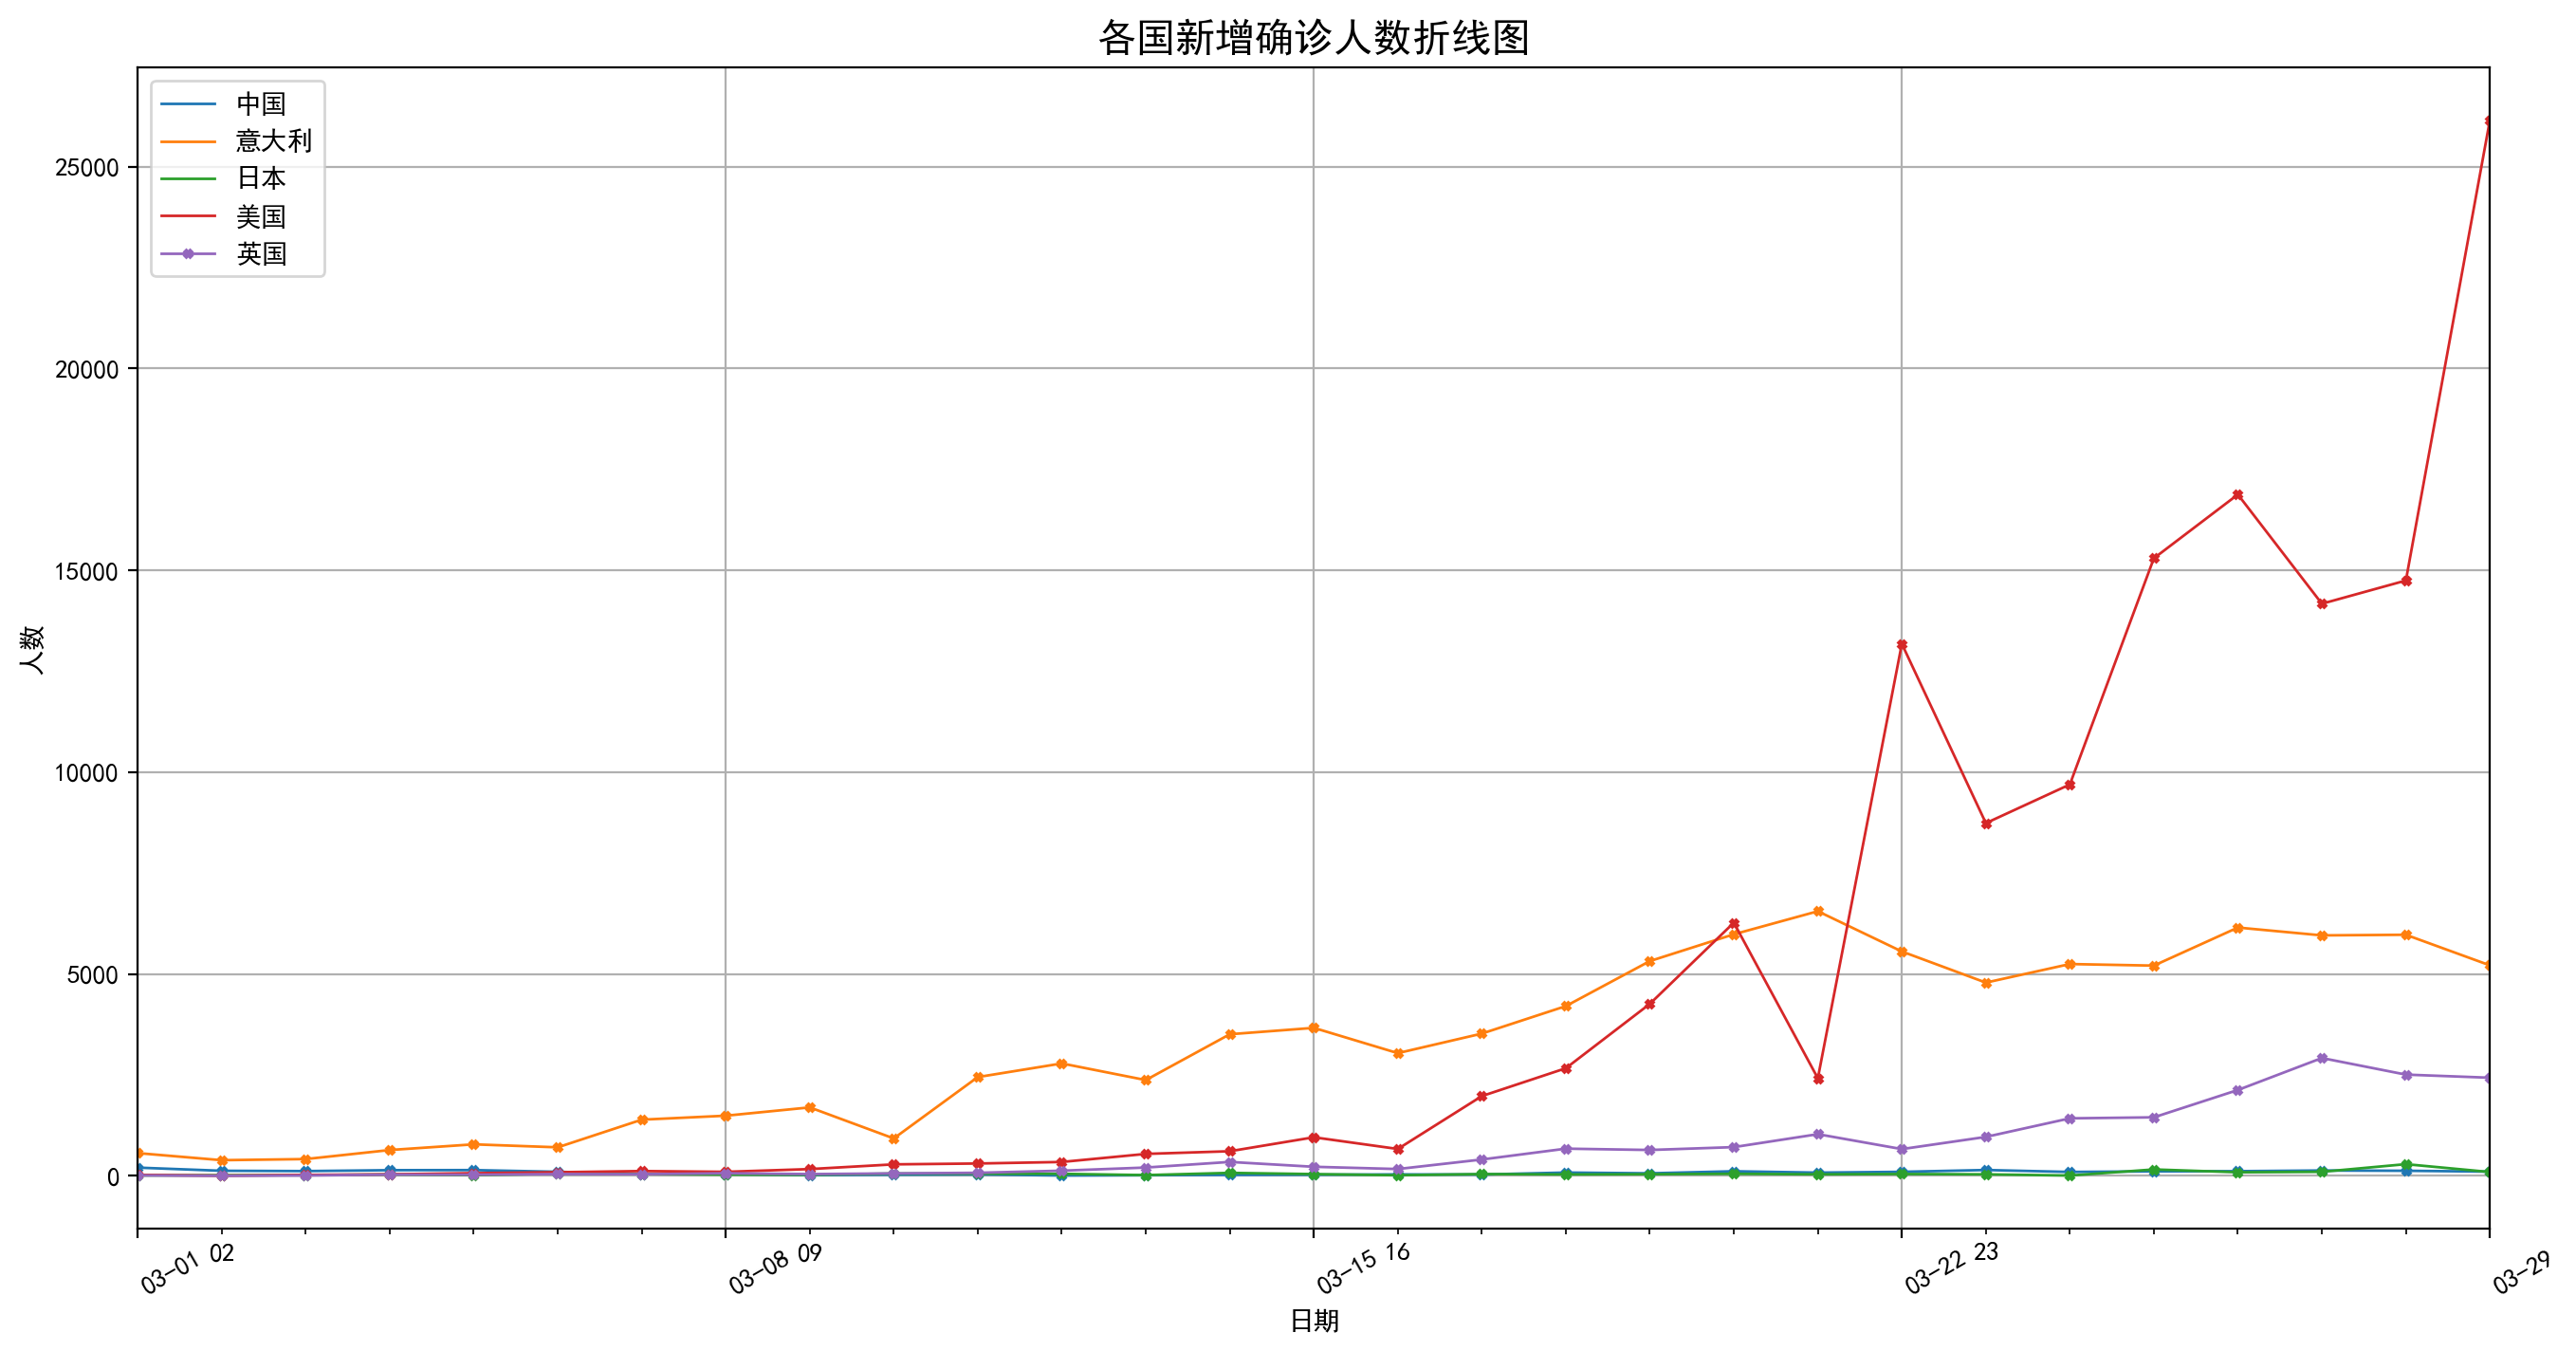

In [150]:
#各国确诊人数统计图3月
fig,ax = plt.subplots(figsize=(16,9),dpi=200)

data_part['2020-03':'2020-03-29'].groupby('名称')['当日新增确诊'].plot(legend=True,marker='X',ms=3,lw=1)
ax.xaxis.set_major_locator(dates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d'))

fig.autofmt_xdate(bottom=0.2,ha='left')
plt.title('各国新增确诊人数折线图',fontsize=15)
plt.ylabel('人数')
plt.grid()
plt.savefig('118426.png')
plt.show()

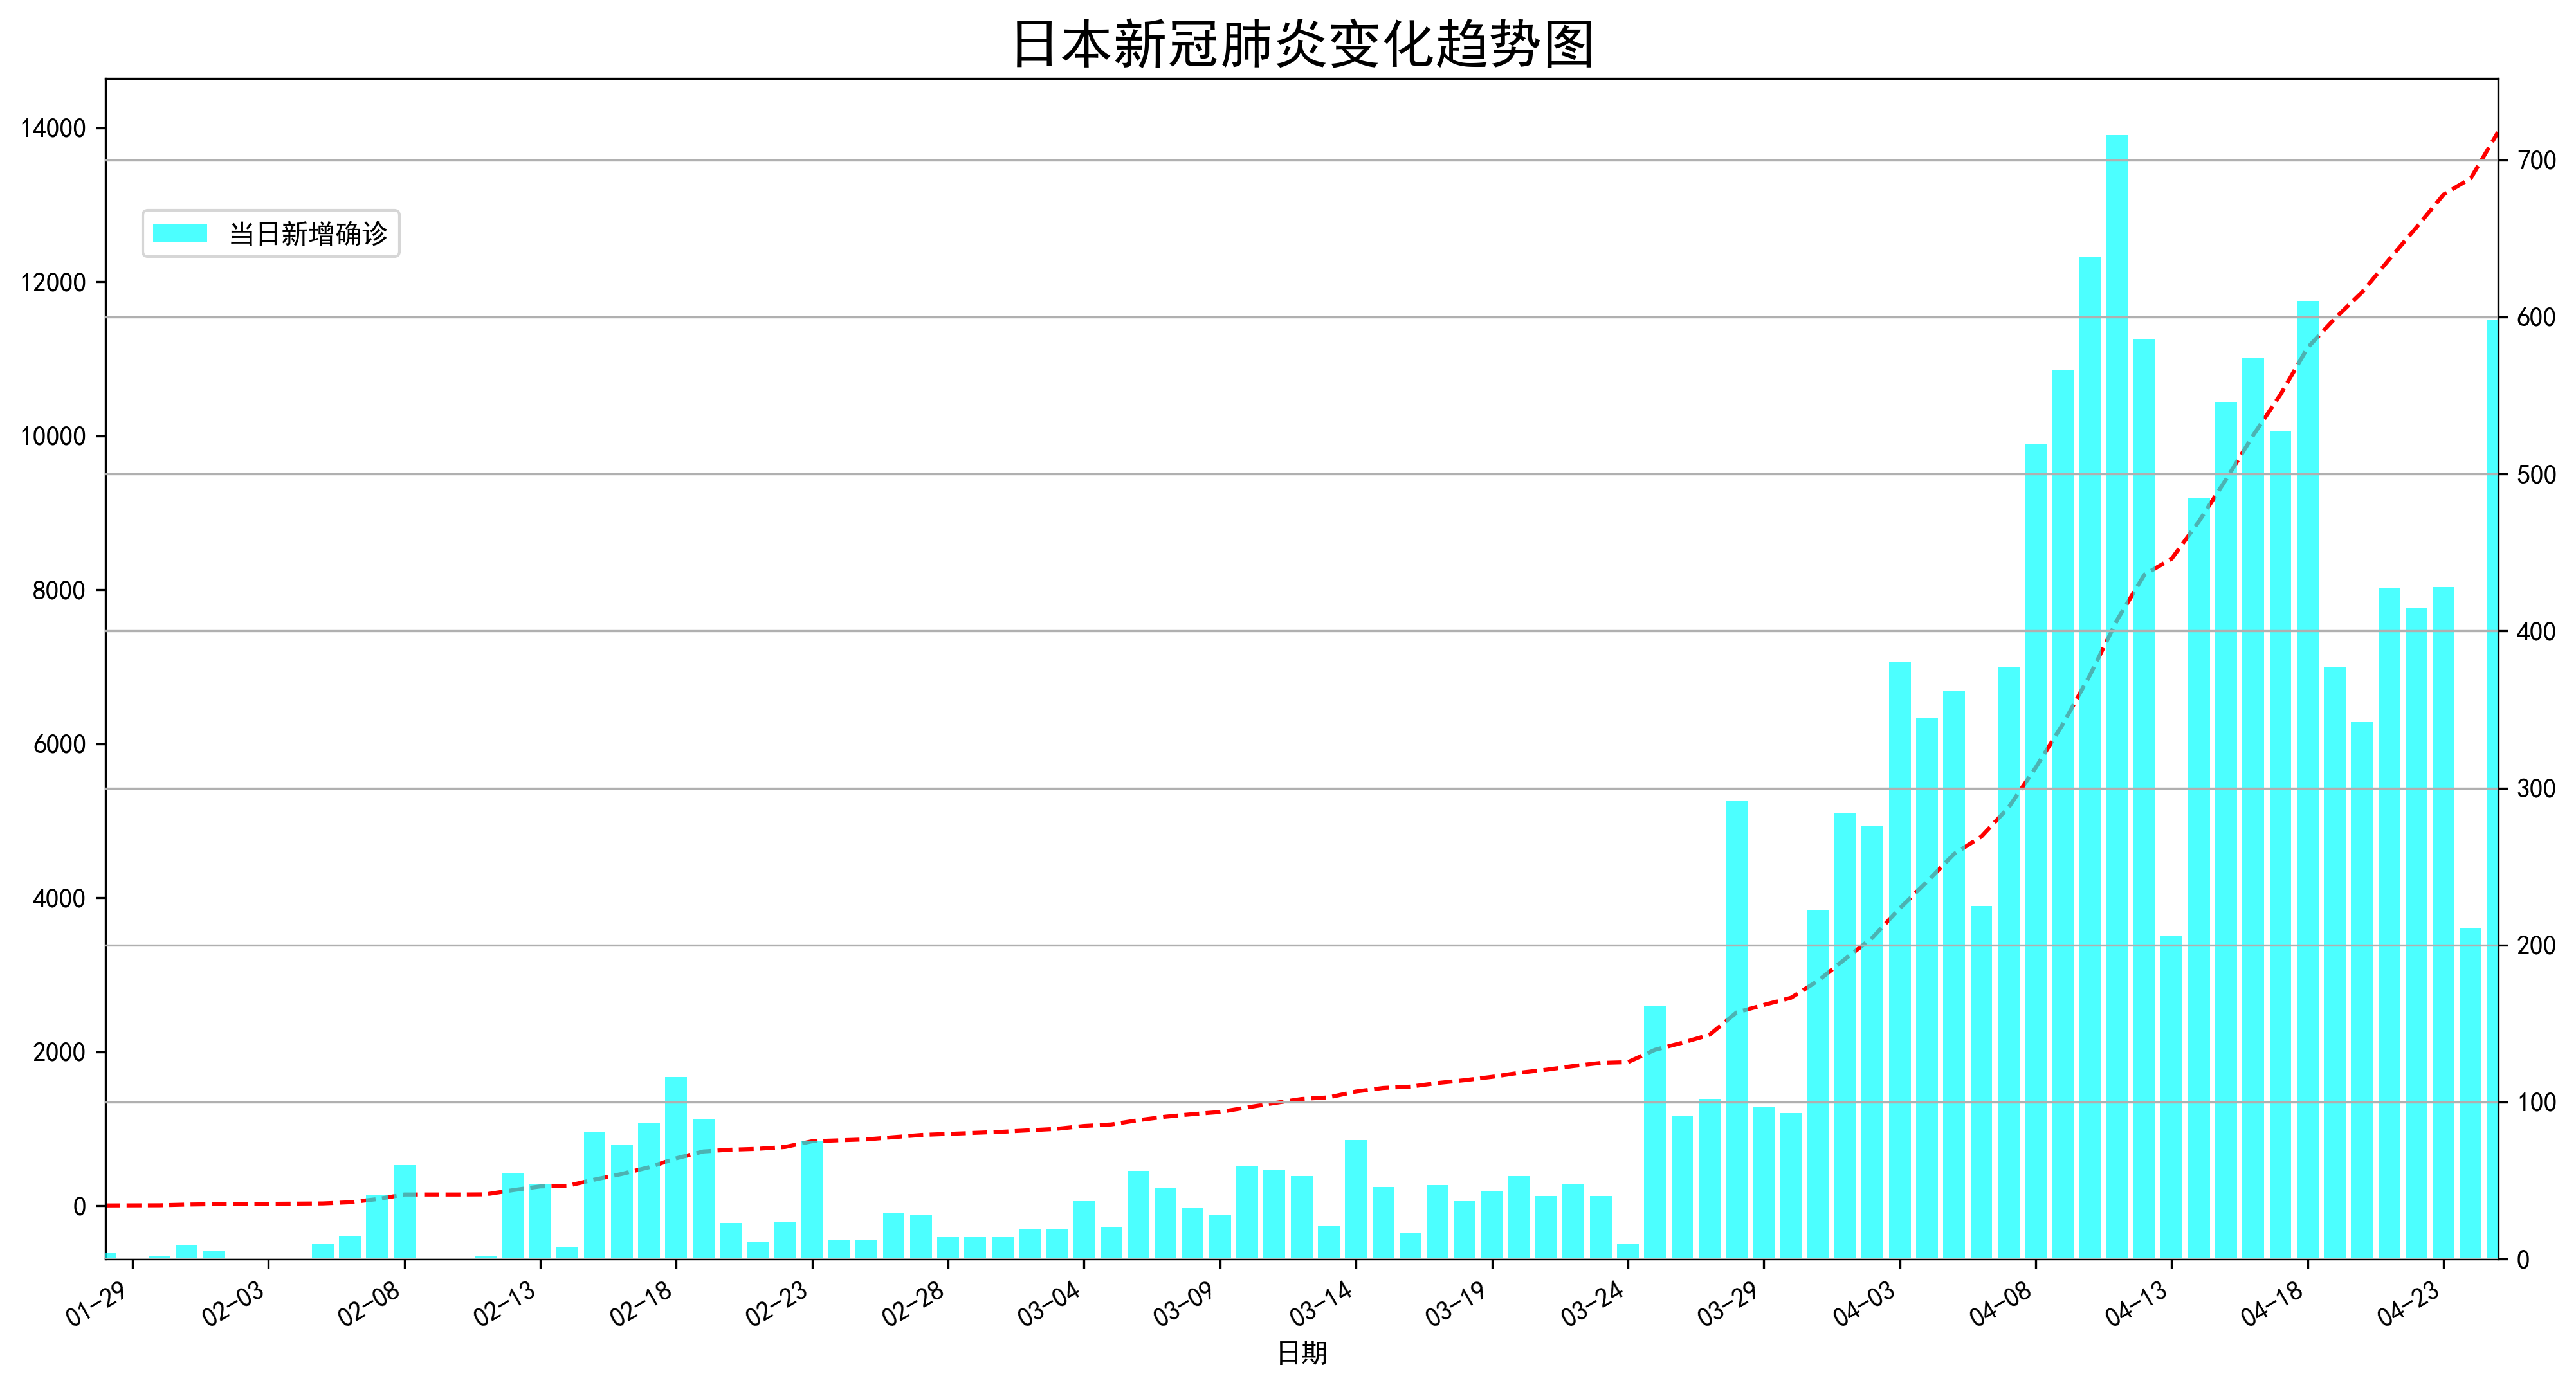

In [149]:
#日本新冠疫情折线图（柱状）
japan = data_part[data_part['名称'] == '日本']
fig,ax=plt.subplots(figsize=(16,9),dpi=300)
japan['累计确诊'].plot(linestyle='--',ax=ax,color='red')
ax1 = ax.twinx()
ax1.bar(japan.index,japan['当日新增确诊'],alpha=0.7,color='cyan')
ax1.xaxis.set_major_locator(dates.DayLocator(interval=5))
ax1.xaxis.set_major_formatter(dates.DateFormatter('%m-%d'))
ax1.legend(['当日新增确诊'],loc='upper left',bbox_to_anchor=(0.01,0.9))
plt.grid(axis='y')
plt.box(False)
plt.title('日本新冠肺炎变化趋势图',fontsize=20)
plt.show()